In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv

## Implementation

In [353]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [354]:
class Ridge:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.coef_ = None

    def fit(self, X, y):
        # Add a column of ones for the bias term
        X = np.c_[np.ones(X.shape[0]), X]

        # Calculate the coefficients using the Ridge formula
        n, m = X.shape
        identity_matrix = np.identity(m)
        self.coef_ = np.linalg.inv(X.T @ X + self.alpha * identity_matrix) @ X.T @ y

    def predict(self, X):
        # Add a column of ones for the bias term
        X = np.c_[np.ones(X.shape[0]), X]

        # Make predictions
        return X @ self.coef_

In [355]:
class PolynomialFeaturesCustom:
    def __init__(self, degree=2):
        self.degree = degree

    def fit_transform(self, X):
        n, m = X.shape
        result = np.ones((n, 1))

        for d in range(1, self.degree + 1):
            result = np.concatenate([result, X ** d], axis=1)

        return result

In [356]:
class PolynomialFeatures:
    def __init__(self, degree=2):
        self.degree = degree

    def fit_transform(self, X):
        n, m = X.shape
        result = np.ones((n, 1))

        for d in range(1, self.degree + 1):
            result = np.concatenate([result, X ** d], axis=1)

        return result

## Polynomial basis functions

## 1

In [357]:
# Load the Auto MPG dataset
# Replace 'path/to/auto-mpg.data' with the actual path to your file
file_path = 'auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv(file_path, delim_whitespace=True, names=column_names)

# Drop non-numeric columns (if necessary)
df = df.drop(columns=['car name'])

# Replace '?' with NaN and convert columns to numeric
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Extract features (X) and target variable (y)
X = df.drop(columns=['mpg'])
y = df['mpg']

# Print mean and standard deviation of normalized features and target
# print("Mean of normalized features:", np.mean(X_normalized, axis=0))
# print("Standard deviation of normalized features:", np.std(X_normalized, axis=0))
# print("Mean of normalized target:", np.mean(y_normalized))
# print("Standard deviation of normalized target:", np.std(y_normalized))

In [358]:

def train_test_split(X, y, test_size=0.2, random_state=None):

    if random_state is not None:
        np.random.seed(random_state)

    num_samples = len(X)
    test_samples = int(test_size * num_samples)

    # Shuffle indices
    indices = np.random.permutation(num_samples)

    # Split the indices into training and test sets
    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]

    # Convert indices to integer values
    train_indices = train_indices.astype(int)
    test_indices = test_indices.astype(int)

    # Split the data based on the indices
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    return X_train, X_test, y_train, y_test

# Example usage:
# X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)


In [359]:
# Remove rows with NaN values
df = df.dropna()
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model year  origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4    

In [360]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\User\AppData\Local\Temp\ipykernel_8852\3756573230.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


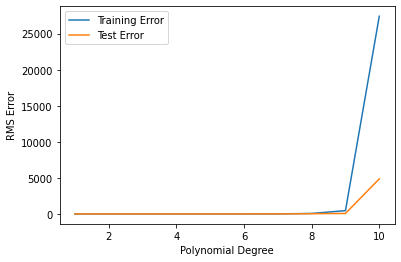

In [361]:
# Function to perform Ridge regression
def ridge_regression(X, y, alpha=1.0):
    X_with_bias = np.c_[np.ones(X.shape[0]), X]
    identity_matrix = np.identity(X_with_bias.shape[1])
    coefficients = np.linalg.inv(X_with_bias.T @ X_with_bias + alpha * identity_matrix) @ X_with_bias.T @ y
    return coefficients

# Impute NaN values in X_train with the mean of each column
X_train.fillna(X_train.mean(), inplace=True)

# Set the degrees of polynomials to try
degrees = np.arange(1, 11)

# Regularization parameter for Ridge regression
alpha = 0.01

# Initialize lists to store training and testing errors
train_errors = []
test_errors = []

# Iterate over polynomial degrees
for degree in degrees:
    # Initialize lists to store features for each variable separately
    X_train_poly_list = []
    X_test_poly_list = []
    
    # Iterate over each input variable
    for col in X_train.columns:
        X_train_col = X_train[col].values.reshape(-1, 1)
        X_test_col = X_test[col].values.reshape(-1, 1)
        
        # Create polynomial features
        X_train_col_poly = X_train_col
        X_test_col_poly = X_test_col

        for d in range(2, degree + 1):
            X_train_col_poly = np.c_[X_train_col_poly, X_train_col**d]
            X_test_col_poly = np.c_[X_test_col_poly, X_test_col**d]

        X_train_poly_list.append(X_train_col_poly)
        X_test_poly_list.append(X_test_col_poly)
    
    # Concatenate features for each variable separately
    X_train_poly = np.concatenate(X_train_poly_list, axis=1)
    X_test_poly = np.concatenate(X_test_poly_list, axis=1)

    # Perform Ridge regression
    coefficients = ridge_regression(X_train_poly, y_train, alpha=alpha)

    # Predictions on training and testing sets
    X_train_poly_with_bias = np.c_[np.ones(X_train_poly.shape[0]), X_train_poly]
    X_test_poly_with_bias = np.c_[np.ones(X_test_poly.shape[0]), X_test_poly]

    y_train_pred = X_train_poly_with_bias @ coefficients
    y_test_pred = X_test_poly_with_bias @ coefficients

    # Calculate RMS error for training and testing sets
    train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the training and testing errors versus polynomial degree
plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, test_errors, label='Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMS Error')
plt.legend()
plt.show()

## 2

C:\Users\User\AppData\Local\Temp\ipykernel_8852\3840737111.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


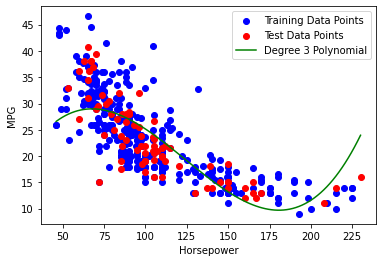

In [362]:
# Replace 'path/to/auto-mpg.data' with the actual path to your file
file_path = 'auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv(file_path, delim_whitespace=True, names=column_names)

# Drop non-numeric columns (if necessary)
df = df.drop(columns=['car name'])

# Replace '?' with NaN and convert columns to numeric
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Extract features (X) and target variable (y)
X = df[['horsepower']]  # Use only the third column as a feature
y = df['mpg']

# Split the data into training and testing sets
np.random.seed(42)  # for reproducibility
mask = np.random.rand(len(df)) < 0.8
X_train, y_train = X[mask], y[mask]
X_test, y_test = X[~mask], y[~mask]

# Impute NaN values in X_train with the mean of the column
X_train.fillna(X_train.mean(), inplace=True)

# Set the degree of the polynomial
degree = 3  # Change this to the desired degree

# Create polynomial features
X_train_poly = np.column_stack([X_train['horsepower'] ** i for i in range(1, degree + 1)])

# Solve the normal equations to get the coefficients
coefficients = np.linalg.inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train.values

# Generate points for plotting the learned polynomial
X_plot = np.linspace(X['horsepower'].min(), X['horsepower'].max(), 100)
X_plot_poly = np.column_stack([X_plot ** i for i in range(1, degree + 1)])

# Predictions on training and test sets
y_train_pred = X_train_poly @ coefficients
y_test_pred = X_plot_poly @ coefficients

# Plotting
plt.scatter(X_train, y_train, label='Training Data Points', color='blue')
plt.scatter(X_test, y_test, label='Test Data Points', color='red')
plt.plot(X_plot, y_test_pred, label=f'Degree {degree} Polynomial', color='green')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

## 3


C:\Users\User\AppData\Local\Temp\ipykernel_8852\2929396028.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


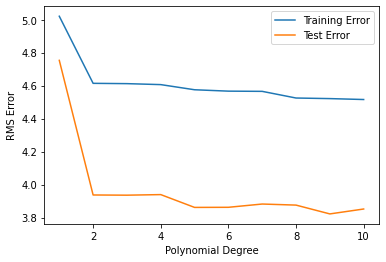

In [363]:

# Function to calculate the mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Function to perform Ridge regression
def ridge_regression(X, y, alpha=1.0):
    X_with_bias = np.c_[np.ones(X.shape[0]), X]
    identity_matrix = np.identity(X_with_bias.shape[1])
    coefficients = np.linalg.inv(X_with_bias.T @ X_with_bias + alpha * identity_matrix) @ X_with_bias.T @ y
    return coefficients

# Impute NaN values in X_train with the mean of each column
X_train.fillna(X_train.mean(), inplace=True)

# Set the degrees of polynomials to try
degrees = np.arange(1, 11)

# Regularization parameter for Ridge regression
alpha = 0.01

# Initialize lists to store training and testing errors
train_errors = []
test_errors = []

# Iterate over polynomial degrees
for degree in degrees:
    # Initialize lists to store features for each variable separately
    X_train_poly_list = []
    X_test_poly_list = []
    
    # Iterate over each input variable
    for col in X_train.columns:
        X_train_col = X_train[col].values.reshape(-1, 1)
        X_test_col = X_test[col].values.reshape(-1, 1)
        
        # Create polynomial features
        X_train_col_poly = X_train_col
        X_test_col_poly = X_test_col

        for d in range(2, degree + 1):
            X_train_col_poly = np.c_[X_train_col_poly, X_train_col**d]
            X_test_col_poly = np.c_[X_test_col_poly, X_test_col**d]

        X_train_poly_list.append(X_train_col_poly)
        X_test_poly_list.append(X_test_col_poly)
    
    # Concatenate features for each variable separately
    X_train_poly = np.concatenate(X_train_poly_list, axis=1)
    X_test_poly = np.concatenate(X_test_poly_list, axis=1)

    # Perform Ridge regression
    coefficients = ridge_regression(X_train_poly, y_train, alpha=alpha)

    # Predictions on training and testing sets
    X_train_poly_with_bias = np.c_[np.ones(X_train_poly.shape[0]), X_train_poly]
    X_test_poly_with_bias = np.c_[np.ones(X_test_poly.shape[0]), X_test_poly]

    y_train_pred = X_train_poly_with_bias @ coefficients
    y_test_pred = X_test_poly_with_bias @ coefficients

    # Calculate RMS error for training and testing sets
    train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the training and testing errors versus polynomial degree
plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, test_errors, label='Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMS Error')
plt.legend()
plt.show()


## Gaussian basis functions


## 1

C:\Users\User\AppData\Local\Temp\ipykernel_8852\743709140.py:61: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y_test[:len(y_test_pred)]


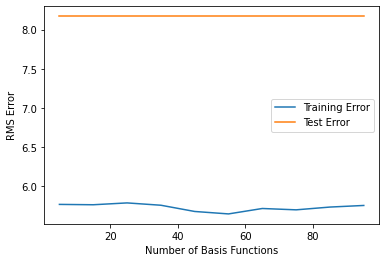

In [364]:

# Load the Auto MPG dataset
file_path = 'auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv(file_path, delim_whitespace=True, names=column_names)

# Drop non-numeric columns (if necessary)
df = df.drop(columns=['car name'])

# Replace '?' with NaN and convert columns to numeric
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Extract features (X) and target variable (y)
X = df[['horsepower']]  # Use only the third column as a feature
y = df['mpg']

# Take the first 100 points as training data
X_train, X_test, y_train, y_test = X[:100], X[100:], y[:100], y[100:]

# Set the bandwidth parameter for Gaussian basis functions
s = 2

# Set the number of basis functions to try
num_basis_functions_list = list(range(5, 100, 10))

# Initialize lists to store training and testing errors
train_errors = []
test_errors = []

# Iterate over the number of basis functions
for num_basis_functions in num_basis_functions_list:
    # Randomly choose training data points as centers for Gaussian basis functions
    centers = X_train.sample(n=num_basis_functions, random_state=42)

    # Calculate Gaussian basis function values and handle NaN values
    phi_train = np.exp(-(X_train - centers) ** 2 / (2 * s ** 2))
    phi_train.fillna(0, inplace=True)  # Impute NaN values with 0
    phi_test = np.exp(-(X_test - centers) ** 2 / (2 * s ** 2))
    phi_test.fillna(0, inplace=True)  # Impute NaN values with 0

    # Add a bias term to the basis functions
    phi_train = np.concatenate([np.ones((len(X_train), 1)), phi_train], axis=1)
    phi_test = np.exp(-(X_test.values - centers.values.reshape(1, -1)) ** 2 / (2 * s ** 2))
    phi_test = np.concatenate([np.ones((len(X_test), 1)), phi_test], axis=1)

    # Solve the normal equations to get the coefficients
    coefficients = np.linalg.inv(phi_train.T @ phi_train) @ phi_train.T @ y_train.values

    # Check the number of coefficients and add a bias term
    num_coefficients = phi_train.shape[1]
    if len(coefficients) != num_coefficients:
        # Add a bias term if necessary
        coefficients = np.concatenate([[0], coefficients])

    # Predictions on training and test sets
    y_train_pred = phi_train @ coefficients

    y_test = y_test[:len(y_test_pred)]
    # Calculate RMS error for training and testing sets
    train_error = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
    test_error = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the training and testing errors versus the number of basis functions
plt.plot(num_basis_functions_list, train_errors, label='Training Error')
plt.plot(num_basis_functions_list, test_errors, label='Test Error')
plt.xlabel('Number of Basis Functions')
plt.ylabel('RMS Error')
plt.legend()
plt.show()

## 2

C:\Users\User\AppData\Local\Temp\ipykernel_8852\1715762967.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


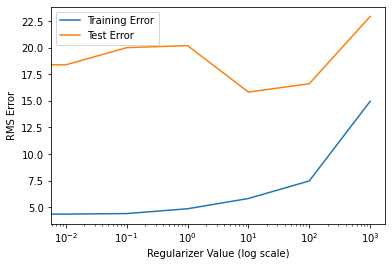

In [365]:

# Load the Auto MPG dataset
file_path = 'auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv(file_path, delim_whitespace=True, names=column_names)

# Drop non-numeric columns (if necessary)
df = df.drop(columns=['car name'])

# Replace '?' with NaN and convert columns to numeric
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Extract features (X) and target variable (y)
X = df.drop(columns=['mpg'])
y = df['mpg']

# Take the first 100 points
X_train, X_test, y_train, y_test = X.iloc[:100, :], X.iloc[100:, :], y.iloc[:100], y.iloc[100:]

# Impute NaN values in X_train with the mean of each column
X_train.fillna(X_train.mean(), inplace=True)

# Set the number of basis functions
num_basis_functions = 5  # Reduce the degree

# Set the regularization values to try
alphas = [0, 0.01, 0.1, 1, 10, 100, 1000]

# Initialize lists to store training and testing errors
train_errors = []
test_errors = []

# Set the bandwidth parameter for Gaussian basis functions
s = 2

# Calculate Gaussian basis function values for training set
phi_train = np.exp(-(X_train - X_train.mean(axis=0)) ** 2 / (2 * s ** 2))

# Calculate Gaussian basis function values for test set
phi_test = np.exp(-(X_test - X_train.mean(axis=0)) ** 2 / (2 * s ** 2))

# Add a bias term to the basis functions
phi_train = np.concatenate([np.ones((len(X_train), 1)), phi_train], axis=1)
phi_test = np.concatenate([np.ones((len(X_test), 1)), phi_test], axis=1)

# Iterate over regularization values
for alpha in alphas:
    # Solve the normal equations to get the coefficients
    coefficients = inv(phi_train.T @ phi_train + alpha * np.identity(phi_train.shape[1])) @ phi_train.T @ y_train.values

    # Predictions on training and test sets
    y_train_pred = phi_train @ coefficients
    y_test_pred = phi_test @ coefficients

    # Calculate RMS error for training and testing sets
    train_error = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
    test_error = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the training and testing errors versus regularizer value on a log scale
plt.semilogx(alphas, train_errors, label='Training Error')
plt.semilogx(alphas, test_errors, label='Test Error')
plt.xlabel('Regularizer Value (log scale)')
plt.ylabel('RMS Error')
plt.legend()
plt.show()